# Step 1) Import Packages, Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# Step 2) EDA

In [3]:
# test should have one less column b/c there is no 'SalePrice'
print(train.shape, test.shape)

(2051, 81) (879, 80)


> Checks out... Now going to get an idea about how much data is missing, and the data types in here.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

> Time to get our eyes on the data

In [6]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


> Lots of columns, lots of missing values. First off, we know ID and PID have nothing to do with Sale Price, they are simply identifiers for the homes in the dataset. Let's drop those and then divide this cleanup into numerical and categorical data

In [8]:
train.drop(labels = ['Id', 'PID'], inplace = True, axis = 1)

### Numerical Data Cleanup

In [9]:
train_numeric_columns = train._get_numeric_data().columns
test_numeric_columns = train_numeric_columns.drop('SalePrice') # columns are same except 'SalePrice'

In [10]:
# look at missing numeric data
train[train_numeric_columns].isnull().sum()

MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [11]:
test[test_numeric_columns].isnull().sum()

MS SubClass          0
Lot Frontage       160
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area         1
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt       45
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
dtype: int64

#### Key Assumption
> For `Lot Frontage` we'll impute the mean value for the column  
For everything else, we'll use `0`

In [12]:
train['Lot Frontage'].fillna(np.mean(train['Lot Frontage']), inplace = True)
# NOTE: We impute the same value in our testing data as our training data
test['Lot Frontage'].fillna(np.mean(train['Lot Frontage']), inplace = True)

In [13]:
for column in train_numeric_columns:
    train[column] = train[column].fillna(value = 0)
    
for column in test_numeric_columns:
    test[column] = test[column].fillna(value = 0)

### Categorical Cleanup

In [14]:
# no need to make distinction b/w train & test, they are identical in both datasets
categorical_columns = train.select_dtypes(include='object').columns

In [15]:
# find missing categorical data
train[categorical_columns].isnull().sum()

MS Zoning            0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin Type 2      56
Heating              0
Heating QC           0
Central Air          0
Electrical           0
Kitchen Qual         0
Functional           0
Fireplace Qu      1000
Garage Type        113
Garage Finish      114
Garage Qual        114
Garage Cond        114
Paved Drive          0
Pool QC           2042
Fence             1651
Misc Feature      1986
Sale Type            0
dtype: int64

In [16]:
test[categorical_columns].isnull().sum()

MS Zoning           0
Street              0
Alley             821
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        1
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Heating             0
Heating QC          0
Central Air         0
Electrical          1
Kitchen Qual        0
Functional          0
Fireplace Qu      422
Garage Type        44
Garage Finish      45
Garage Qual        45
Garage Cond        45
Paved Drive         0
Pool QC           875
Fence             707
Misc Feature      838
Sale Type           0
dtype: int64

> Per the data dict, all of these features take 'NA' or 'None' as a value to represent that a home does not have that feature. Pandas likely converted them directly into NaN's, so I will impute the string 'NA' for all of them, understanding that it is the same thing as 'None'.

In [17]:
for column in categorical_columns:
    train[column].fillna(value = 'NA', inplace = True)
    test[column].fillna(value = 'NA', inplace = True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       2051 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2051 non-null object
Exterior 1st      

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       879 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              879 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof 

> All clean!  Let's take a closer look at the correlation to Sales Price for every relationship.

### Data Visualization

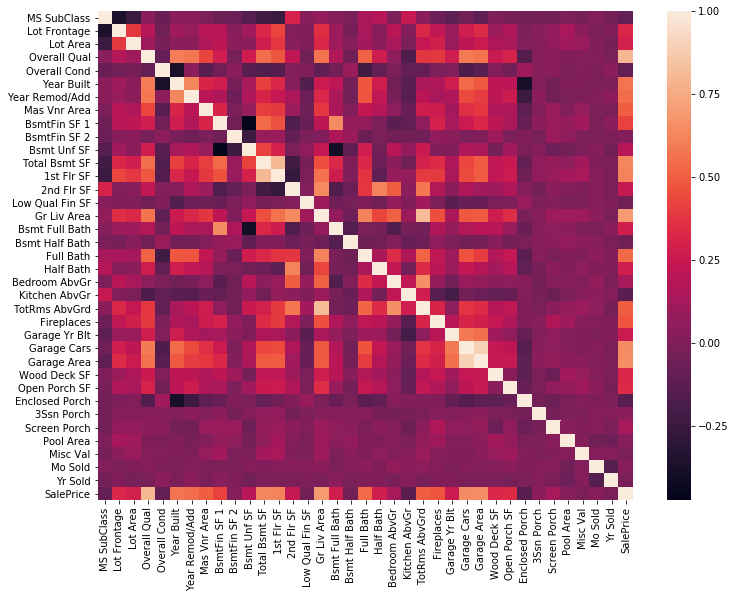

In [20]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr())

> Wow that's a lot to look at... scanning the `SalePrice` column we can clearly see that `Overall Qual`, `Gr Liv Area`, `Garage Cars`, and `Garage Area` have decent correlations, but let's simplify things a little bit and put them into an ordered dataframe by correlation value.

In [21]:
correlations = {}

for column in train_numeric_columns:
    correlations[column] = np.corrcoef(train['SalePrice'], train[column])[0,1]
    
correlation_df = pd.DataFrame.from_dict(correlations, orient = 'index', columns = ['Correlation'])

In [22]:
correlation_df.sort_values(by = 'Correlation', ascending = False).head(11)

,Correlation
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.649897
Garage Cars,0.647781
Total Bsmt SF,0.629303
1st Flr SF,0.618486
Year Built,0.571849
Year Remod/Add,0.550370
Full Bath,0.537969


> Look at that! Now we can clearly see which categories have a strong relationship with `SalePrice`.  Let's visualize these first 10 relationships in scatter plots.

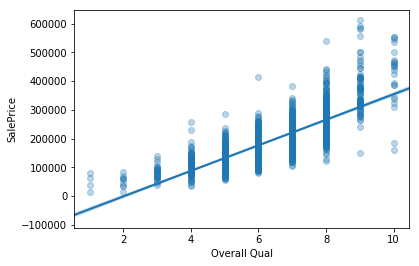

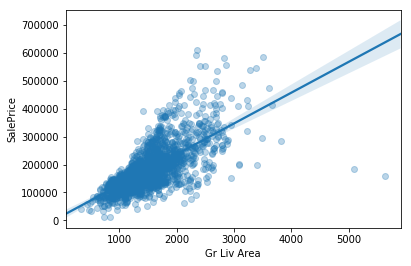

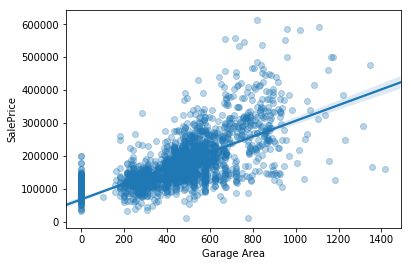

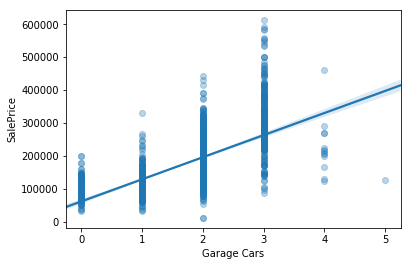

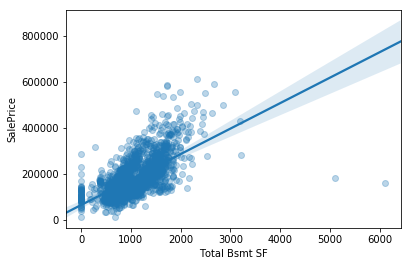

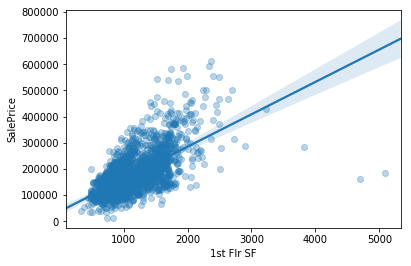

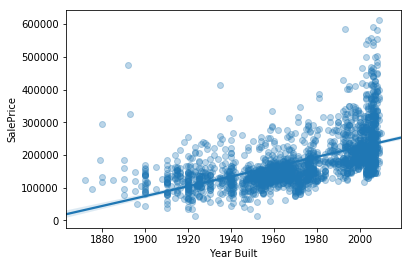

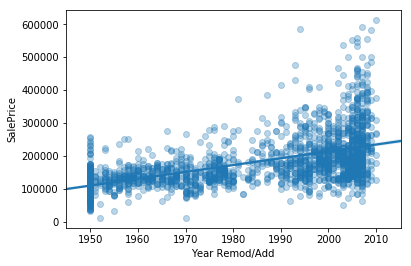

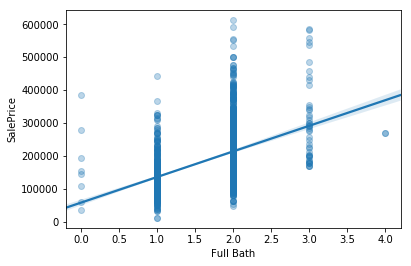

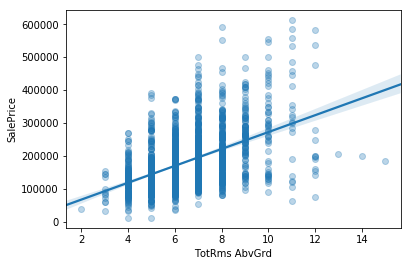

In [23]:
scattergories = ['Overall Qual', 
             'Gr Liv Area', 
             'Garage Area', 
             'Garage Cars', 
             'Total Bsmt SF', 
             '1st Flr SF', 
             'Year Built', 
             'Year Remod/Add', 
             'Full Bath', 
             'TotRms AbvGrd']

for i, col in enumerate(scattergories):
    plt.figure(i)
    sns.regplot(train[col], train['SalePrice'], scatter_kws={'alpha':0.3})

> Before splitting our data into training and testing sets, we need to create dummy variables.  The reason I am doing this first, is that when we split our data into training and testing sets we might have one dummy variable in our training set that is not in our testing set, or vice versa. This means that when we "dummy" the data, we'll end up with a different number of features in one over the other. Once we fit our model to the training set, and try to see how it performs on the testing set that would inevitably cause some issues if they have a different number of features.

In [24]:
train_dummied = pd.get_dummies(train)
print(train_dummied.shape)

test_dummied = pd.get_dummies(test)
print(test_dummied.shape)

(2051, 305)
(879, 289)


> Hmm... BEFORE we can move on, there appears to be a different number of columns in our dummy versions of testing and training data. This is exactly the type of problem I described right before doing this; our testing data has some categorical columns that simply don't use as many items from the data dictionary as our training data. We would be fine at this point to move forward and create a model, but if we wanted to make a prediction on the testing data set to submit to Kaggle we'd have some issues. We're going to drop the dummy columns in the training data that are not in the testing data.

In [25]:
for column in train_dummied.columns:
    if column not in test_dummied.columns:
        train_dummied.drop(labels = column, axis = 1, inplace = True)
        
print(len(train_dummied.columns), len(test_dummied.columns))

277 289


> We know that 'ID' and 'PID' are not in the training data, so it makes sense that there are fewer columns in the training data. However, there should not be 12 fewer columns; let's go ahead and do the same thing for the testing data. Since this isn't the original test data frame that contains the 'ID' and 'PID' columns, I'm just going to include those in this drop.  When we predict on our model, we will add the predicted `SalePrice` to the original `test` df which will contain those features.

In [26]:
for column in test_dummied.columns:
    if column not in train_dummied.columns:
        test_dummied.drop(labels = column, axis = 1, inplace = True)

print(train_dummied.shape, test_dummied.shape)

(2051, 277) (879, 277)


In [27]:
train_dummied.columns == test_dummied.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

> Woohoo!  Now our dummied dataframes have the exact same features in them for the test and training sets

## Step 3) Train Test Split

> We're going to start with every feature in the dataset to intentionally overfit our model and widdle our way down to the best model with some nifty feature engineering and selection.

In [28]:
X = train_dummied
y = train['SalePrice']

In [29]:
# splitting our TRAINING data set into testing and training datasets
# this will allow us to somewhat evaluate our model's ability to generalize before facing a true test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# check out the size of training/testing sets
print(X_train.shape, X_test.shape)

(1538, 277) (513, 277)


## Step 4) Modeling

### Baseline Model
This uses no poly features, simply includes every feature in our `train_dummied` df.

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
print(cross_val_score(model, X_train, y_train), cross_val_score(model, X_train, y_train).mean())

[ 0.7051222  -0.1945528   0.59779253] 0.36945397603243535


> Compare this score to test data and evaluate bias/variance, generalizability, etc.

In [33]:
print(cross_val_score(model, X_test, y_test), cross_val_score(model, X_test, y_test).mean())

[0.80646049 0.80048864 0.78801962] 0.7983229143835064


In [34]:
model.intercept_

-1022515.6470748184

> So when everything else is zero, the price of a home starts at -1,022,515.65; seems reasonable...

In [35]:
# sanity check
print(len(model.coef_), model.coef_)

277 [-1.17935128e+02 -4.78485529e+01  9.06117823e-01  7.23955269e+03
  4.73799823e+03  2.20194790e+02  1.14406513e+02  2.15513591e+01
  9.44576815e+00  6.73476600e+00 -3.45734786e-02  1.61459614e+01
  8.89209447e+00  2.04272352e+01 -3.33236447e+00  2.59869962e+01
  6.43071437e+03 -4.65782637e+01  5.57141618e+03  3.21298238e+03
 -1.43695752e+03 -1.16128608e+04  1.76330732e+03  3.52611073e+03
 -1.13227197e+01  5.97952080e+03  2.92113978e+00  3.19346287e+00
 -2.91367447e+00  1.35593601e+01  4.24552191e+01  7.53067512e+01
  2.27915574e+02 -1.59011177e+01 -1.97281905e+02 -1.16609942e+01
 -3.97586844e+03  1.29810108e+04 -6.94944902e-09  1.04110454e+04
  7.45411007e+03  5.55149317e+03 -3.64452907e+03  3.64452907e+03
  1.78874461e+03  2.31053740e+01 -1.81184998e+03  8.56709109e+03
  9.61556660e+03 -2.62451612e+04  8.06250351e+03 -8.62733495e+03
  8.24135570e+03  4.22628464e+01  3.43716398e+02  2.18642526e-09
 -1.12777343e-09  1.28252899e+03  5.08973104e+03 -3.85646025e+03
 -2.66868915e+03  1.5

In [36]:
test['SalePrice'] = model.predict(test_dummied) # using test_dummied instead of test b/c num of coefficients

In [37]:
# Used a 50% test_size in TTS
# test[['Id', 'SalePrice']].to_csv('./submissions/dixon_submission_2.csv', index = False)

In [38]:
# # Uses the default test_size in TTS
# test[['Id', 'SalePrice']].to_csv('./submissions/dixon_submission_3.csv', index = False)
# # It didn't do any better...

### Regularization Models
- Going to standardize our features to put all coefficients on the same scale using `StandardScaler()`
- Currently using same features as the baseline model, this will change below.

> As I figure out the best features to select, I'm going to have to remove some features

In [39]:
# QUESTION: Does it make more sense to scale all data at once & then TTS again?
ss = StandardScaler()
# using training data; if we used included testing data the variance would be included in our model
X_train_scaled = ss.fit_transform(X_train) # Note: y does not get scaled
X_test_scaled = ss.fit_transform(X_test)
test_df_scaled = ss.fit_transform(test_dummied) # coefficients based on scaled values need to predict based on scaled values

# putting X_scaled into df to look at scaled values
pd.DataFrame(X_train_scaled, columns = X.columns).head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,-0.856027,0.711964,0.131102,-0.076947,0.400164,-0.028539,-0.629478,1.159913,0.840886,-0.283011,...,-0.175588,-0.19258,-0.07231,-0.036084,-0.092329,-0.044209,-0.036084,-0.285614,-0.044209,0.388841
1,0.301295,1.711216,0.540450,0.623315,2.218337,-1.155710,-0.199259,-0.558774,-0.331752,-0.283011,...,-0.175588,-0.19258,-0.07231,-0.036084,-0.092329,-0.044209,-0.036084,-0.285614,-0.044209,0.388841
2,-0.856027,-0.423550,-0.507892,-0.777209,2.218337,-0.724733,0.852389,-0.558774,-0.097224,0.593720,...,-0.175588,-0.19258,-0.07231,-0.036084,-0.092329,-0.044209,-0.036084,-0.285614,-0.044209,0.388841
3,0.069831,0.484861,0.745400,0.623315,-0.508923,0.800262,0.613378,-0.558774,1.614827,-0.283011,...,-0.175588,-0.19258,-0.07231,-0.036084,-0.092329,-0.044209,-0.036084,-0.285614,-0.044209,0.388841
4,0.069831,-0.012258,0.363699,1.323577,1.309251,0.767110,0.517774,2.093240,-0.945787,-0.283011,...,-0.175588,-0.19258,-0.07231,-0.036084,-0.092329,-0.044209,-0.036084,-0.285614,-0.044209,0.388841


> Now that data is scaled, going to create Lasso and Ridge models

### Ridge

In [40]:
r_alphas = np.logspace(0, 5, 200)
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values = True)
ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000e+00, 1.05956e+00, ..., 9.43788e+04, 1.00000e+05]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [41]:
ridge_model.alpha_

922.1978823334332

In [42]:
ridge_model.intercept_

181061.9934980494

In [43]:
len(ridge_model.coef_)

array([-1.60241839e+03,  5.76239312e+02,  2.35417003e+03,  6.26997801e+03,
        2.09833769e+03,  1.83077622e+03,  2.17690525e+03,  3.16763666e+03,
        2.47319316e+03,  7.47699749e+02,  5.75003115e+02,  3.38748100e+03,
        4.12980675e+03,  2.82481984e+03,  1.17286356e+01,  5.66313370e+03,
        2.68192315e+03, -3.95983162e+02,  3.32187005e+03,  1.84779567e+03,
        1.23005129e+03, -1.02167513e+03,  4.12548858e+03,  2.58168132e+03,
        2.05239757e+01,  3.42459805e+03,  3.14411365e+03,  1.35821470e+03,
        7.22086380e+02,  2.89880248e+02,  6.72788685e+02,  3.16139106e+03,
       -8.11351144e+02, -4.22987345e+03, -1.32438153e+01,  1.52845673e+01,
       -7.98242029e+02,  7.72171983e+02,  0.00000000e+00,  2.50669393e+02,
        4.58001011e+02, -7.46441524e+02, -2.31978255e+02,  2.31978255e+02,
       -1.54328988e+02,  2.83949611e+02, -2.53273116e+02,  6.12795950e+02,
        9.51051106e+02, -2.16561132e+03, -6.01698893e+02, -1.66718170e+03,
        1.71021993e+03, -

In [44]:
cross_val_score(ridge_model, X_train_scaled, y_train).mean()

0.8267146621872432

In [45]:
test['SalePrice'] = ridge_model.predict(test_df_scaled)

In [46]:
# ridge model export
# test[['Id', 'SalePrice']].to_csv('./submissions/dixon_submission_4.csv', index = False)

### Lasso

In [47]:
lasso_model = LassoCV()
lasso_model.fit(X_train_scaled, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [48]:
lasso_model.alpha_

1363.5133355701273

> Hmmmm based on what little I know about this model, that alpha seems awfully high. I think I'm going to remove the features that have been "zeroed out" by their coefficients.

In [49]:
features_coefs = {
    'Features': train_dummied.columns,
    'Coefficients': lasso_model.coef_
}
features_coefs_df = pd.DataFrame(features_coefs)

In [50]:
# grabbing features with coefficients of 0
drop_features = []
for index, row in features_coefs_df.iterrows():
    if row['Coefficients'] == 0:
        drop_features.append(row['Features'])

len(drop_features)

202

> Going to drop 202 features

In [51]:
# saving in a new df b/c I want to keep the dummy df intact for Polynomial features
lasso_features = train_dummied.drop(labels = drop_features, axis = 1)

> Redo the TTS & Scaling

In [52]:
X = lasso_features
y = train['SalePrice']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
print(X_train.shape, X_test.shape)

(1538, 75) (513, 75)


In [55]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)
# Only focusing on features that haven't been dropped
test_df_scaled = ss.fit_transform(test_dummied[lasso_features.columns])

> Redo the Lasso

In [56]:
lasso_model.fit(X_train_scaled, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [57]:
lasso_model.alpha_

293.7600430473368

> Better, but still "eh".

In [58]:
test['SalePrice'] = lasso_model.predict(test_df_scaled)

In [59]:
# # lasso model
# test[['Id', 'SalePrice']].to_csv('./submissions/dixon_submission_5.csv', index = False)

## Step 6) Feature Engineering
- Going to redo the ridge and lasso, but first going to create polynomial features from the dummy data sets

In [60]:
poly = PolynomialFeatures(include_bias = False)

In [61]:
X = train_dummied

In [62]:
X_poly = poly.fit_transform(X)
X_poly.shape

(2051, 38780)

In [63]:
# creating df of polynomial features for TTS
poly_df = pd.DataFrame(X_poly, columns = poly.get_feature_names(train_dummied.columns))

In [64]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(poly_df, y, random_state = 42)

In [65]:
# Scale
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

In [66]:
# Lasso
lasso_model = LassoCV()
lasso_model.fit(X_train_scaled, y_train) # don't run this line unless you mean it

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [67]:
features_coefs = {
    'Features': poly.get_feature_names(train_dummied.columns),
    'Coefficients': lasso_model.coef_
}
features_coefs_df = pd.DataFrame(features_coefs)

In [68]:
drop_features = []
for index, row in features_coefs_df.iterrows():
    if row['Coefficients'] == 0:
        drop_features.append(row['Features'])

len(drop_features)

38421

> Dropping 38,421 features

In [69]:
# new df for the poly features that weren't dropped
lasso_features = poly_df.drop(labels = drop_features, axis = 1)

In [70]:
lasso_features.shape

(2051, 359)

In [71]:
X = lasso_features
y = train['SalePrice']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [73]:
# Scale
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

In [74]:
# create lasso model for poly features that weren't eliminated
lasso_model = LassoCV()
lasso_model.fit(X_train_scaled, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [75]:
# creating poly features in test df and scaling to use in prediction
poly = PolynomialFeatures(include_bias = False)
# create poly features for test data
poly_test = poly.fit_transform(test_dummied)
# create df for test poly features to be scaled
poly_test_df = pd.DataFrame(poly_test, columns = poly.get_feature_names(test_dummied.columns))
# drop the same columns as the train data
poly_test_df.drop(labels = drop_features, axis = 1, inplace = True)

# re-instantiate just to be explicit
ss = StandardScaler()
poly_test_scaled = ss.fit_transform(poly_test_df)

In [76]:
# evaluate model
cross_val_score(lasso_model, X_train, y_train).mean()

0.7487456535991085

In [77]:
# creates poly features for test data
test['SalePrice'] = lasso_model.predict(poly_test_scaled)

In [78]:
# test[['Id', 'SalePrice']].to_csv('./submissions/dixon_submission_6.csv', index = False)

In [79]:
coefficients = lasso_model.coef_

In [80]:
len(lasso_features.columns)

359

In [81]:
lasso_coefficients = pd.DataFrame.from_dict(dict(zip(lasso_features.columns, lasso_model.coef_)), columns = ['Coefficients'], orient = 'index')

lasso_coefficients.shape

(359, 1)

In [108]:
lasso_coefficients.sort_values(by = 'Coefficients', ascending = True).head(20)

,Coefficients
Land Contour_Bnk Exter Qual_Ex,-17474.895952
Total Bsmt SF Neighborhood_Edwards,-2290.192882
Wood Deck SF Roof Style_Mansard,-1961.741321
2nd Flr SF MS Zoning_RM,-1610.230546
Condition 1_Artery Kitchen Qual_Gd,-1352.488018
Exterior 1st_MetalSd Fireplace Qu_Po,-1340.412244
Neighborhood_NoRidge Exterior 1st_HdBoard,-1260.510772
Mas Vnr Area Lot Shape_IR3,-1200.152849
Land Slope_Mod Neighborhood_NoRidge,-1196.933527
Condition 1_Artery Garage Qual_TA,-1152.739030


In [83]:
# dropping even more features
for index, row in lasso_coefficients.iterrows():
    if abs(row['Coefficients']) < 1:
        lasso_coefficients.drop(labels = index, axis = 0, inplace = True)

lasso_coefficients.shape

(284, 1)

In [84]:
# redo lasso on the features left in lasso_coefficients

In [85]:
# scaled training data
ss = StandardScaler()
train_scaled = ss.fit_transform(lasso_features[lasso_coefficients.index])
test_scaled = ss.fit_transform(poly_test_df[lasso_coefficients.index])

In [86]:
# getting lazy so I'm not going to bother with TTS
lasso_model.fit(train_scaled, y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [87]:
test['SalePrice'] = lasso_model.predict(test_scaled)

In [88]:
# one last submission after grabbing high score, pretty haphazard effort
# test[['Id', 'SalePrice']].to_csv('./submissions/dixon_submission_7.csv', index = False)

In [89]:
lasso_coefficients_2 = pd.DataFrame.from_dict(dict(zip(lasso_coefficients.index, lasso_model.coef_)), columns = ['Coefficients'], orient = 'index')

lasso_coefficients_2.shape

(284, 1)

In [90]:
for index, row in lasso_coefficients_2.iterrows():
    if abs(row['Coefficients']) < 100:
        lasso_coefficients_2.drop(labels = index, axis = 0, inplace = True)

lasso_coefficients_2.shape

(209, 1)

In [91]:
# scaled training data
ss = StandardScaler()
train_scaled = ss.fit_transform(lasso_features[lasso_coefficients_2.index])
test_scaled = ss.fit_transform(poly_test_df[lasso_coefficients_2.index])

In [92]:
lasso_model.fit(train_scaled, y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [93]:
test['SalePrice'] = lasso_model.predict(test_scaled)

In [94]:
# okay I lied it's kind of addicting to see your score get better. This might be my last time.
# test[['Id', 'SalePrice']].to_csv('./submissions/dixon_submission_8.csv', index = False)
# and upon further review that didn't help so I'm done.

In [107]:
cross_val_score(lasso_model, train_scaled, y).mean()

0.9517533801128876

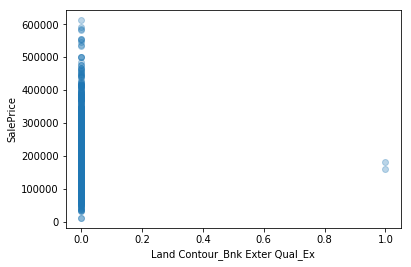

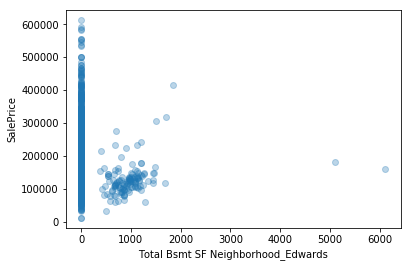

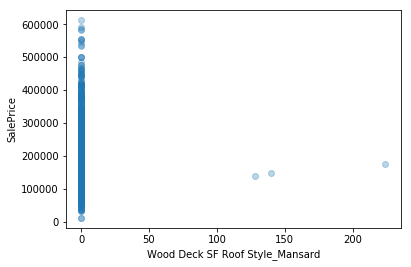

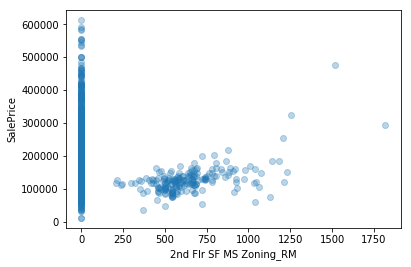

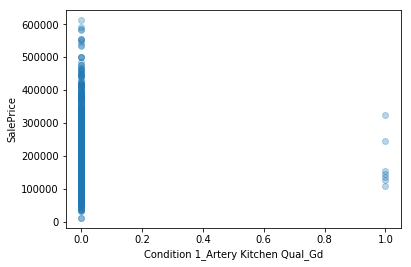

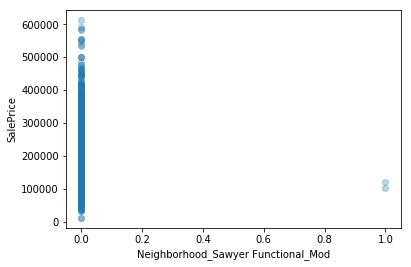

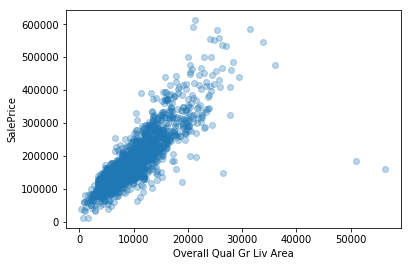

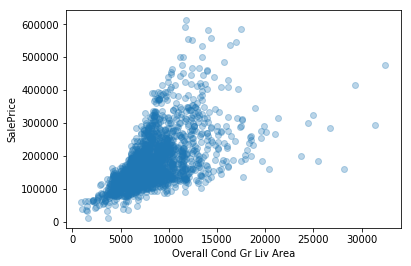

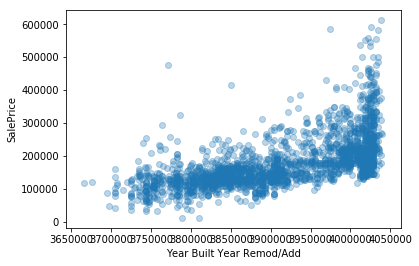

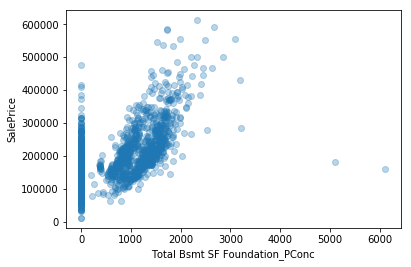

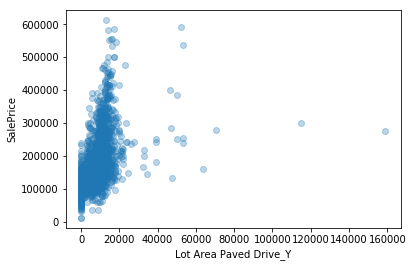

In [102]:
# view relationships for largest coefficients in model

influencers = ['Land Contour_Bnk Exter Qual_Ex',
               'Total Bsmt SF Neighborhood_Edwards',
               'Wood Deck SF Roof Style_Mansard',
               '2nd Flr SF MS Zoning_RM',
               'Condition 1_Artery Kitchen Qual_Gd',
               'Neighborhood_Sawyer Functional_Mod',
               'Overall Qual Gr Liv Area',
               'Overall Cond Gr Liv Area',
               'Year Built Year Remod/Add',
               'Total Bsmt SF Foundation_PConc',
               'Lot Area Paved Drive_Y']

for i, col in enumerate(influencers):
    plt.figure(i)
    sns.regplot(lasso_features[col], train['SalePrice'], scatter_kws={'alpha':0.3}, fit_reg = False)

In [103]:
import statsmodels.api as sm

In [ ]:
X['intercept'] = 1
model = sm.OLS(y,X).fit()

sm.